# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

In [2]:
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})

In [3]:
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

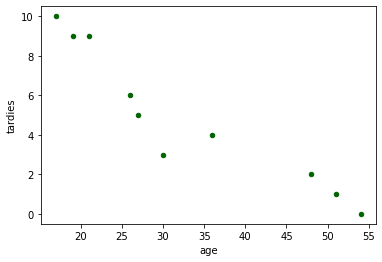

In [4]:
student_data.plot.scatter(x='age', y='tardies',color='DarkGreen');


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:
# A mayor juventud mayor retraso

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
import pylab as plt
# import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(15, 8)   # tamaño por defecto, decenas de pixeles

import seaborn as sns

In [11]:
import numpy as np

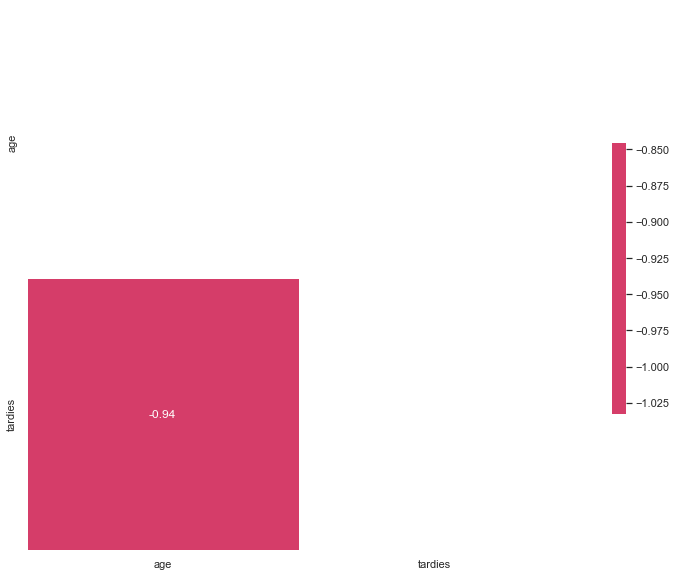

In [12]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(student_data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(student_data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [52]:
X = student_data.drop('tardies',axis = 1) # DATA FRAME
y = student_data['tardies'] # SERIE

np.cov(X,y)

# np.cov(student_data['age'],student_data['tardies'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 10

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
from sklearn.model_selection import train_test_split as tts 

In [16]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [17]:
from sklearn.linear_model import LinearRegression as LinReg

In [18]:
linreg=LinReg()  # 1º INICIAR modelo nombre = modelo importado

linreg.fit(X_train, y_train) # 2º ENTRENAR los valores train >>>> modelo.fit(x_train, y_train)

y_pred_test=linreg.predict(X_test) # 3º CALCULAR Y PREDECIR  >>>'y_predecida' = modelo.predict(x_test)  ++++ X_TEST ++++

y_pred_test[:10] # 4º PRINT 

# Total de x e y : X_train,X_test,y_train,y_test,y_pred <<< IMPORTANTE OBTENER LA Y_PRED

array([6.4893434 , 0.37637389])

In [19]:
linreg=LinReg()  # 1º INICIAR modelo nombre = modelo importado

linreg.fit(X_train, y_train) # 2º ENTRENAR los valores train >>>> modelo.fit(x_train, y_train)

y_pred_train=linreg.predict(X_train) # 3º CALCULAR Y PREDECIR  >>>'y_predecida' = modelo.predict(x_train)  ++++ X_TRAIN ++++

y_pred_train[:10] # 4º PRINT 

# Total de x e y : X_train,X_test,y_train,y_test,y_pred <<< IMPORTANTE OBTENER LA Y_PRED

array([ 5.72522221,  8.5269999 ,  8.01758578,  6.74405046,  9.03641403,
       -0.3877473 ,  4.19697983,  1.14049508])

In [20]:
X_train

,age
9,30
6,19
3,21
7,26
0,17
8,54
4,36
5,48


In [21]:
y_pred_train

array([ 5.72522221,  8.5269999 ,  8.01758578,  6.74405046,  9.03641403,
       -0.3877473 ,  4.19697983,  1.14049508])

In [22]:
list_pred_train = list(y_pred_train)
list_pred_train

[5.725222211602792,
 8.526999904425118,
 8.017585778457423,
 6.7440504635381835,
 9.036414030392812,
 -0.38774730000955593,
 4.1969798336997055,
 1.1404950778935312]

In [24]:
X_train['tardies_pred'] = y_pred_train # a x_train le añadimos la columna tardies pred, que es igual a tardies_pred

In [25]:
X_train['tardies'] = y_train # meter una nueva columna con una nuevo valor al data frame

In [32]:
data_student_pred = X_train

In [34]:
data_student_pred 

,age,tardies_pred,tardies
9,30,5.725222,3
6,19,8.527000,9
3,21,8.017586,9
7,26,6.744050,6
0,17,9.036414,10
8,54,-0.387747,0
4,36,4.196980,4
5,48,1.140495,2


Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

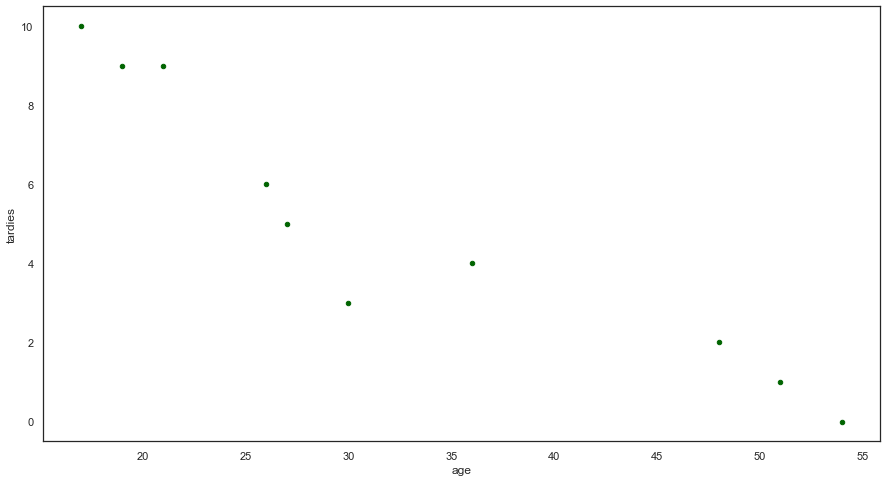

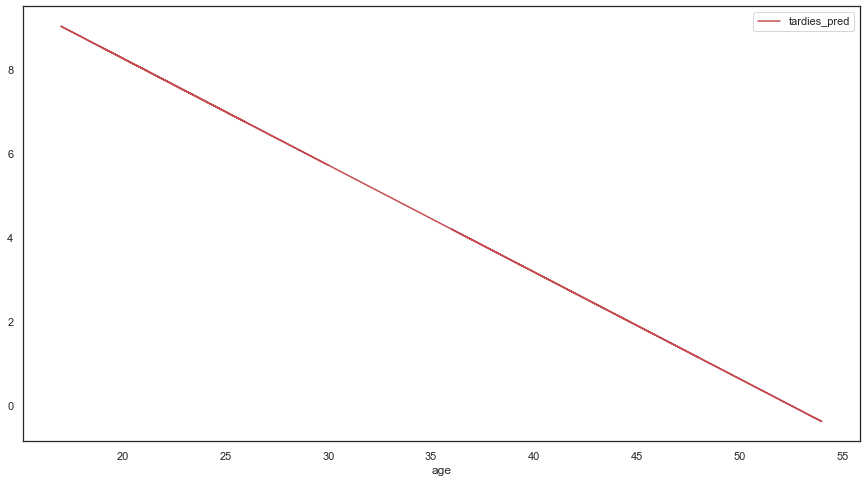

In [39]:
student_data.plot.scatter(x='age', y='tardies',color='DarkGreen');
data_student_pred.plot(x='age', y='tardies_pred',color='r'); # linea tardies  predichas 
plt.show


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [40]:
from sklearn.metrics import mean_squared_error as mse   

mse(y_test, y_pred_test)

1.303526645584046

In [41]:
from sklearn.metrics import mean_squared_error as mse   

mse(y_train, y_pred_train)

1.3782137054382109

In [ ]:
no es una buen predictor, no predice con gran exactitud, posiblemente debido a los pocos datos de la muestra

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [43]:
x=sm.add_constant(student_data.age) # data frame menos la columna objetivo

y=student_data.tardies # columna objetivo

modelo=sm.OLS(y, x).fit()

In [44]:
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        15:13:53   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# p>t = describe si existe una relacion directa entre la columna y la columna objetivo ¿HAY RELACION? si/no

# R-squared = Alta correlacion ¿ QUE RELACION HAY? cuantitativa


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
auto=pd.read_csv(r'C:\Users\pablo\7.3-lab_regression_analysis\data/vehicles.csv')

auto.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
auto1 = auto[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
auto1

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


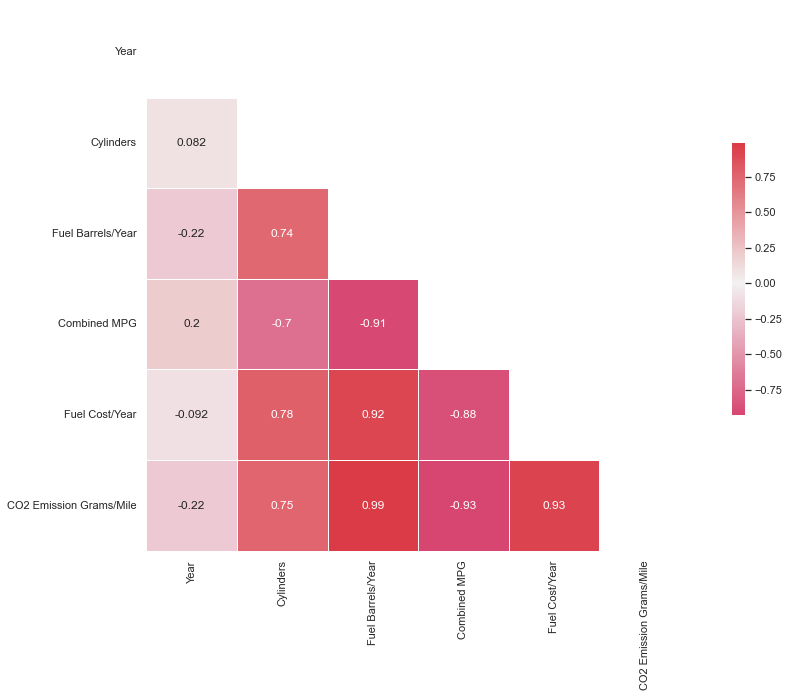

In [54]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(auto1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(auto1.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

la correlacion entre C02 Emision con los valores de fuel BArrels/years tienen una tasa de casi 1 por la tanto los valores estan directamente relacionados

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [83]:
# varias variables

x = sm.add_constant(auto[[
    
    #'Year', # sin la columna year y cylinders R-squared apenas bajas por lo tanto podriamos eliminarlas de cara al modelo
    #'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year'
]])   

y = auto['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                             16:34:56   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel Barrels/Year    19.6955      0.059    331.484      0.000      19.579      19.812
Combined MPG         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
Fuel Cost/Year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion =  sin la columna year y cylinders R-squared apenas baja por lo tanto podriamos eliminarlas de cara al modelo,

Se desprende que las emision de C02 tiene una relacion porcentual del 98% con las 3 columnas restantes.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [90]:
people = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})
people

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [95]:
x=sm.add_constant(people.X)

y=people.Y

modelo=sm.OLS(y, x).fit()

In [96]:
pred=modelo.predict(x)

In [97]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000102
Time:                        16:53:34   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

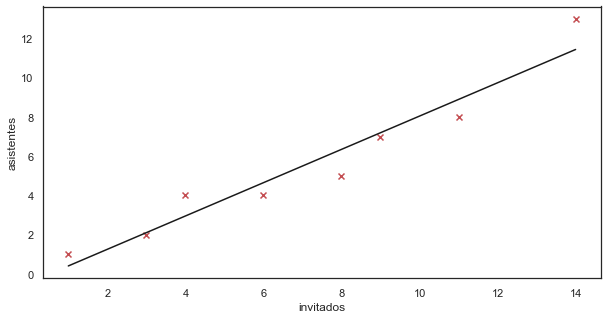

In [100]:
plt.figure(figsize=(10, 5))
y_pred = linreg.predict(X)
# datos
plt.scatter(people.X, people.Y, marker='x', c='r', label='personas') # puntos data original
plt.plot(people.X,pred,color='k') # linea entre invitados y predicion de asistentes
plt.xlabel('invitados')
plt.ylabel('asistentes')
plt.show();


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
Hay una relacion casi lineal en los datos

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2e4a2f610>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2e4a2fbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2e4a2f340>,
 'medians': [<matplotlib.lines.Line2D at 0x1c2e4a39190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c2e4a39460>,
 'means': []}

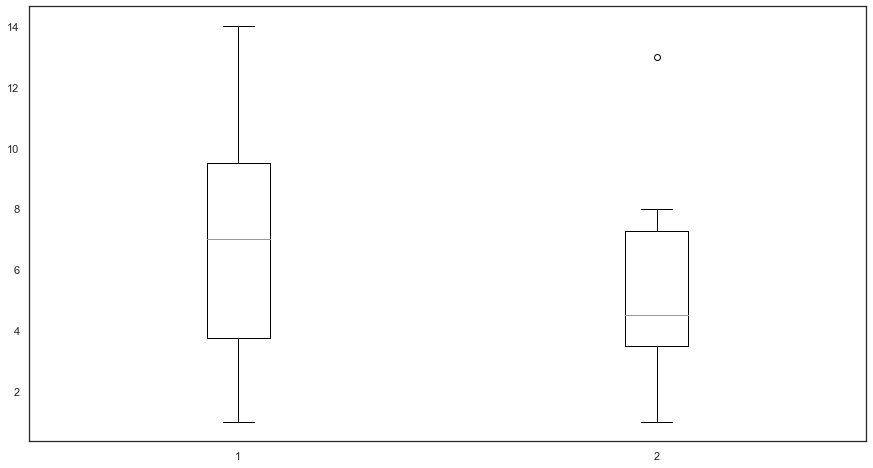

In [103]:
plt.boxplot(people)

In [108]:
p2= people[0:7]
p2

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [109]:
x=sm.add_constant(p2.X)

y=p2.Y

modelo=sm.OLS(y, x).fit()

In [110]:
pred=modelo.predict(x)

In [111]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000264
Time:                        17:04:34   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

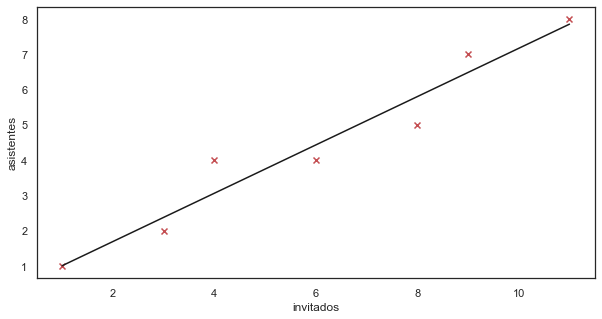

In [112]:
plt.figure(figsize=(10, 5))
y_pred = linreg.predict(X)
# datos
plt.scatter(p2.X, p2.Y, marker='x', c='r', label='personas') # puntos data original
plt.plot(p2.X,pred,color='k') # linea entre invitados y predicion de asistentes
plt.xlabel('invitados')
plt.ylabel('asistentes')
plt.show();